In [1]:
import pandas as pd
import numpy as np
import requests
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [2]:
# Load Truth Social Data
url = "https://stilesdata.com/trump-truth-social-archive/truth_archive.json"
response = requests.get(url)
truth_data = response.json()

df_truth = pd.DataFrame(truth_data)
print(f"Total posts: {len(df_truth)}")
df_truth.head()

Total posts: 29409


,id,created_at,content,url,media,replies_count,reblogs_count,favourites_count
0,115437112529618205,2025-10-25T22:15:50.076Z,"I am on my way to Malaysia, where I will sign ...",https://truthsocial.com/@realDonaldTrump/11543...,[],1134.0,3088.0,12468.0
1,115436984200406691,2025-10-25T21:43:11.929Z,"RT @realDonaldTrumpCanada was caught, red hand...",https://truthsocial.com/@realDonaldTrump/11543...,[],0.0,0.0,1.0
2,115436968622280698,2025-10-25T21:39:14.264Z,https://www.dailysignal.com/2025/10/22/trumps-...,https://truthsocial.com/@realDonaldTrump/11543...,[],302.0,1582.0,6018.0
3,115436967550742005,2025-10-25T21:38:57.913Z,https://www.foxnews.com/opinion/new-high-tech-...,https://truthsocial.com/@realDonaldTrump/11543...,[],214.0,1515.0,5878.0
4,115436966353094571,2025-10-25T21:38:39.636Z,https://www.foxnews.com/politics/scoop-trumps-...,https://truthsocial.com/@realDonaldTrump/11543...,[],211.0,1756.0,6224.0


In [3]:
# Clean Truth Social Data
df_truth['timestamp'] = pd.to_datetime(df_truth['created_at'])
df_truth['date'] = df_truth['timestamp'].dt.date

# Basic text cleaning
def clean_text(text):
    if pd.isna(text):
        return ""
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
     # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    text = text.strip()
    return text

df_truth['cleaned_content'] = df_truth['content'].apply(clean_text)

# Remove empty posts
df_truth = df_truth[df_truth['cleaned_content'] != ""]
print(f"Posts after cleaning: {len(df_truth)}")
df_truth.head()

Posts after cleaning: 18778


,id,created_at,content,url,media,replies_count,reblogs_count,favourites_count,timestamp,date,cleaned_content
0,115437112529618205,2025-10-25T22:15:50.076Z,"I am on my way to Malaysia, where I will sign ...",https://truthsocial.com/@realDonaldTrump/11543...,[],1134.0,3088.0,12468.0,2025-10-25 22:15:50.076000+00:00,2025-10-25,"I am on my way to Malaysia, where I will sign ..."
1,115436984200406691,2025-10-25T21:43:11.929Z,"RT @realDonaldTrumpCanada was caught, red hand...",https://truthsocial.com/@realDonaldTrump/11543...,[],0.0,0.0,1.0,2025-10-25 21:43:11.929000+00:00,2025-10-25,"RT @realDonaldTrumpCanada was caught, red hand..."
8,115436697060819133,2025-10-25T20:30:10.525Z,"Canada was caught, red handed, putting up a fr...",https://truthsocial.com/@realDonaldTrump/11543...,[],401.0,831.0,2715.0,2025-10-25 20:30:10.525000+00:00,2025-10-25,"Canada was caught, red handed, putting up a fr..."
9,115436558661444946,2025-10-25T19:54:58.713Z,We have a very strong PEACE in the Middle East...,https://truthsocial.com/@realDonaldTrump/11543...,[],470.0,1314.0,4887.0,2025-10-25 19:54:58.713000+00:00,2025-10-25,We have a very strong PEACE in the Middle East...
11,115436151669143136,2025-10-25T18:11:28.545Z,Congressman Jimmy Patronis is a MAGA Warrior w...,https://truthsocial.com/@realDonaldTrump/11543...,[],313.0,1260.0,5237.0,2025-10-25 18:11:28.545000+00:00,2025-10-25,Congressman Jimmy Patronis is a MAGA Warrior w...


In [4]:
# Load QQQ Market Data
qqq = yf.download('QQQ', start='2022-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Flatten column names
if isinstance(qqq.columns, pd.MultiIndex):
    qqq.columns = [col[0] for col in qqq.columns]

# Calculate daily returns
qqq['Returns'] = qqq['Close'].pct_change() * 100

print(f"Market data from {qqq.index[0]} to {qqq.index[-1]}")
qqq.head()

/var/folders/xq/pddn9j1n1wq71m29wwc_vjrh0000gn/T/ipykernel_38210/2817354723.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  qqq = yf.download('QQQ', start='2022-01-01', end=datetime.now().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed

Market data from 2022-01-03 00:00:00 to 2025-11-28 00:00:00


,Close,High,Low,Open,Volume,Returns
Date,,,,,,
2022-01-03,392.184052,392.437915,387.497538,389.616221,40575900,NaN
2022-01-04,387.097229,392.769875,383.992413,392.730812,58027200,-1.297050
2022-01-05,375.205231,386.531008,374.951368,385.408170,75739800,-3.072096
2022-01-06,374.941589,378.192883,371.143566,373.379438,70814300,-0.070266
2022-01-07,370.879852,376.640396,369.102901,374.951284,72652300,-1.083299


In [5]:
# Align Data by Date

# Count posts per day
daily_posts = df_truth.groupby('date').size().reset_index(name='post_count')
daily_posts['date'] = pd.to_datetime(daily_posts['date'])

# Merge with market data
qqq_reset = qqq.reset_index()
qqq_reset['date'] = pd.to_datetime(qqq_reset['Date']).dt.date
daily_posts['date'] = daily_posts['date'].dt.date

combined_df = pd.merge(qqq_reset, daily_posts, on='date', how='left')
combined_df['post_count'] = combined_df['post_count'].fillna(0)

print(f"Combined dataset: {len(combined_df)} days")
combined_df.head()

Combined dataset: 981 days


,Date,Close,High,Low,Open,Volume,Returns,date,post_count
0,2022-01-03,392.184052,392.437915,387.497538,389.616221,40575900,NaN,2022-01-03,0.0
1,2022-01-04,387.097229,392.769875,383.992413,392.730812,58027200,-1.297050,2022-01-04,0.0
2,2022-01-05,375.205231,386.531008,374.951368,385.408170,75739800,-3.072096,2022-01-05,0.0
3,2022-01-06,374.941589,378.192883,371.143566,373.379438,70814300,-0.070266,2022-01-06,0.0
4,2022-01-07,370.879852,376.640396,369.102901,374.951284,72652300,-1.083299,2022-01-07,0.0


In [6]:
market_keywords = ['inflation', 'fed', 'economy', 'china', 'stock market', 'tariff', 
                   'trade', 'economic', 'recession', 'gdp', 'unemployment', 'dollar']

def is_market_related(text):
    text_lower = text.lower()
    return any(keyword in text_lower for keyword in market_keywords)

df_truth['is_market_related'] = df_truth['cleaned_content'].apply(is_market_related)

print(f"Market-related posts: {df_truth['is_market_related'].sum()}")
print(f"Non-market posts: {(~df_truth['is_market_related']).sum()}")
df_truth[['cleaned_content', 'is_market_related']].head(10)


Market-related posts: 2106
Non-market posts: 16672


,cleaned_content,is_market_related
0,"I am on my way to Malaysia, where I will sign ...",False
1,"RT @realDonaldTrumpCanada was caught, red hand...",True
8,"Canada was caught, red handed, putting up a fr...",True
9,We have a very strong PEACE in the Middle East...,False
11,Congressman Jimmy Patronis is a MAGA Warrior w...,True
12,"Richard Hudson is a Great Man, and TREMENDOUS ...",True
13,Congressman David Rouzer is a terrific Represe...,True
14,Congressman Addison McDowell is an America Fir...,False
15,Congresswoman Nicole Malliotakis is a Tremendo...,False
16,Congressman Jack Bergman is a Tremendous Champ...,False


In [7]:
# Convert to EST
import pytz

est = pytz.timezone('US/Eastern')
df_truth['timestamp_est'] = df_truth['timestamp'].dt.tz_convert(est)
df_truth['hour_est'] = df_truth['timestamp_est'].dt.hour
df_truth['before_market_close'] = df_truth['hour_est'] < 16

print(f"Posts before 4 PM EST: {df_truth['before_market_close'].sum()}")
print(f"Posts after 4 PM EST: {(~df_truth['before_market_close']).sum()}")
df_truth[['timestamp_est', 'hour_est', 'before_market_close']].head()


Posts before 4 PM EST: 10588
Posts after 4 PM EST: 8190


,timestamp_est,hour_est,before_market_close
0,2025-10-25 18:15:50.076000-04:00,18,False
1,2025-10-25 17:43:11.929000-04:00,17,False
8,2025-10-25 16:30:10.525000-04:00,16,False
9,2025-10-25 15:54:58.713000-04:00,15,True
11,2025-10-25 14:11:28.545000-04:00,14,True


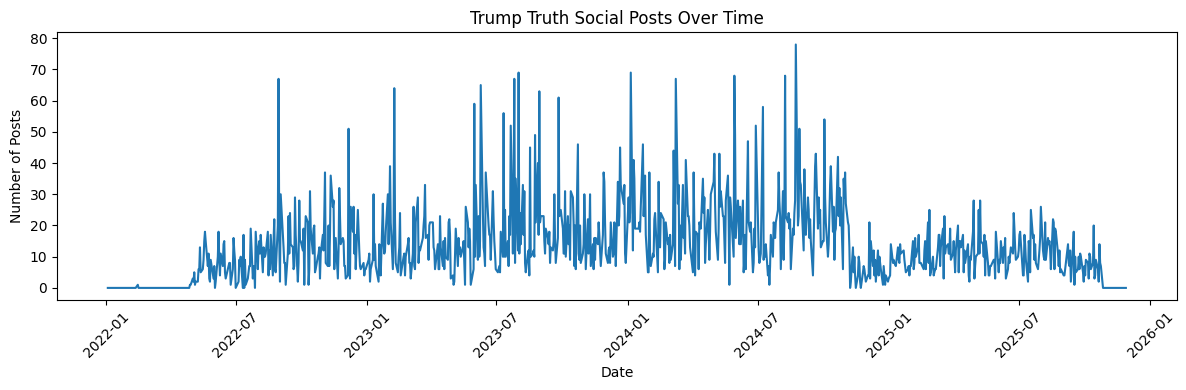

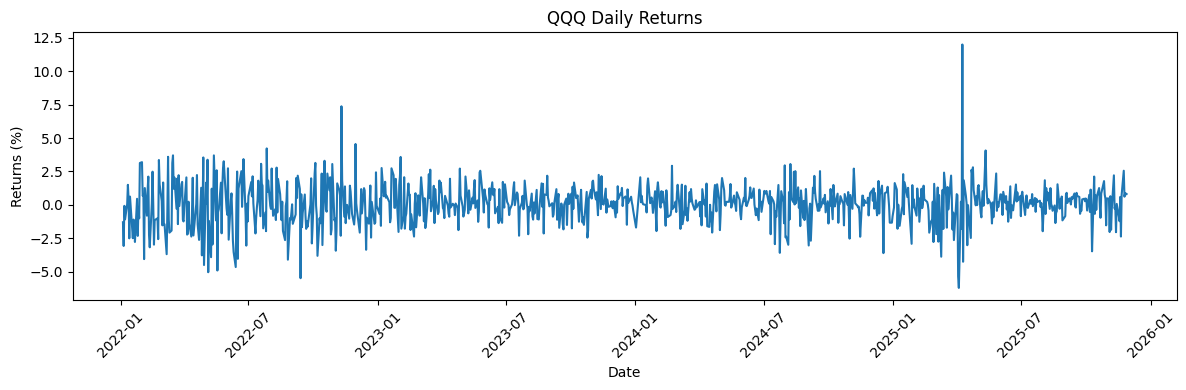

In [8]:
# Posts over time
plt.figure(figsize=(12, 4))
plt.plot(combined_df['date'], combined_df['post_count'])
plt.title('Trump Truth Social Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# QQQ returns
plt.figure(figsize=(12, 4))
plt.plot(combined_df['date'], combined_df['Returns'])
plt.title('QQQ Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Add Market-Related Post Counts

# First, get only the market-related posts
market_posts = df_truth[df_truth['is_market_related'] == True]
daily_market_posts = market_posts.groupby('date').size().reset_index(name='market_post_count')
daily_market_posts['date'] = pd.to_datetime(daily_market_posts['date']).dt.date
combined_df = pd.merge(combined_df, daily_market_posts, on='date', how='left')

# Fill missing values with 0 (days with no market posts)
combined_df['market_post_count'] = combined_df['market_post_count'].fillna(0).astype(int)

print(f"Days with market-related posts: {(combined_df['market_post_count'] > 0).sum()}")
combined_df[['date', 'post_count', 'market_post_count', 'Returns']].head(10)

Days with market-related posts: 600


,date,post_count,market_post_count,Returns
0,2022-01-03,0.0,0,NaN
1,2022-01-04,0.0,0,-1.297050
2,2022-01-05,0.0,0,-3.072096
3,2022-01-06,0.0,0,-0.070266
4,2022-01-07,0.0,0,-1.083299
5,2022-01-10,0.0,0,0.065836
6,2022-01-11,0.0,0,1.502188
7,2022-01-12,0.0,0,0.396576
8,2022-01-13,0.0,0,-2.501625
9,2022-01-14,0.0,0,0.622266


In [10]:
# Quick Correlation Check

# Check if posts are related to market returns
# Correlation tells us if more posts = higher/lower returns

# Calculate correlation
total_posts_corr = combined_df['post_count'].corr(combined_df['Returns'])
market_posts_corr = combined_df['market_post_count'].corr(combined_df['Returns'])

print("Correlation between total posts and returns:", round(total_posts_corr, 4))
print("Correlation between market posts and returns:", round(market_posts_corr, 4))

Correlation between total posts and returns: 0.0019
Correlation between market posts and returns: 0.0031


In [11]:
# Posts after 4 PM affect NEXT day's returns

# Add tomorrow's returns to each row
combined_df['next_day_returns'] = combined_df['Returns'].shift(-1)

# Count how many posts happened after 4 PM each day
posts_after_4pm = df_truth[df_truth['before_market_close'] == False]
daily_after_4pm = posts_after_4pm.groupby('date').size().reset_index(name='posts_after_4pm')
daily_after_4pm['date'] = pd.to_datetime(daily_after_4pm['date']).dt.date

# Add this to our combined data
combined_df = pd.merge(combined_df, daily_after_4pm, on='date', how='left')
combined_df['posts_after_4pm'] = combined_df['posts_after_4pm'].fillna(0).astype(int)

print(f"Days with posts after 4 PM: {(combined_df['posts_after_4pm'] > 0).sum()}")
print("\nSample data:")
combined_df[['date', 'post_count', 'posts_after_4pm', 'Returns', 'next_day_returns']].head(10)

Days with posts after 4 PM: 788

Sample data:


,date,post_count,posts_after_4pm,Returns,next_day_returns
0,2022-01-03,0.0,0,NaN,-1.297050
1,2022-01-04,0.0,0,-1.297050,-3.072096
2,2022-01-05,0.0,0,-3.072096,-0.070266
3,2022-01-06,0.0,0,-0.070266,-1.083299
4,2022-01-07,0.0,0,-1.083299,0.065836
5,2022-01-10,0.0,0,0.065836,1.502188
6,2022-01-11,0.0,0,1.502188,0.396576
7,2022-01-12,0.0,0,0.396576,-2.501625
8,2022-01-13,0.0,0,-2.501625,0.622266
9,2022-01-14,0.0,0,0.622266,-2.489407


In [12]:
# Save cleaned data
df_truth.to_csv('data/truth_social_cleaned.csv', index=False)
combined_df.to_csv('data/combined_data.csv', index=False)